In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import convis

# OPL filters in convis

This notebook compares the different OPL filters that can be used in convis. The most efficient implementation is the `RecursiveOPLFilter`, however it does not allow for inhomogenous spatial and temporal filters.
The other filters are varying levels of adding convolutional filters. `HalfRecursiveOPLFilter` replaces the spatial filters with 2d convolutions that are initialized with the same Gaussian filters, but can be changed to any arbitrary 2d convolution. `SeperatableOPLFilter` uses 2d convolutions for spatial filters, but in addition also uses 1d convolution for temporal filters. Finally, the `FullConvolutionOPLFilter` uses only one single 3d convolutional filter. This is the most computationally expensive filter, however it offers arbitrary 3d receptive fields that can e.g. be made sensitive to motion. The filter is initialized to the impulse response of the `RecursiveOPLFilter` whenever one of its parameters is changed. The accuracy of the full convolution filter depends highly on the size of the used filter. This can be set when creating the layer and the default is a tradeoff of accuracy and efficiencey. In this comparision, a 'heavy' version of the filter is included as well which is twice as large in each direction and provides a better result.

In [3]:
oplR = convis.filters.retina.RecursiveOPLFilter()
oplH = convis.filters.retina.HalfRecursiveOPLFilter()
oplS = convis.filters.retina.SeperatableOPLFilter()
oplF = convis.filters.retina.FullConvolutionOPLFilter()
oplF_heavy = convis.filters.retina.FullConvolutionOPLFilter(shp=(200,21,21))

In [4]:
inp = convis.samples.chirp()*convis.samples.mask_square(width=5)

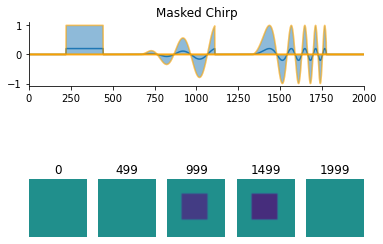

In [5]:
convis.plot(inp,title='Masked Chirp')

CPU times: user 1.18 s, sys: 118 ms, total: 1.3 s
Wall time: 659 ms


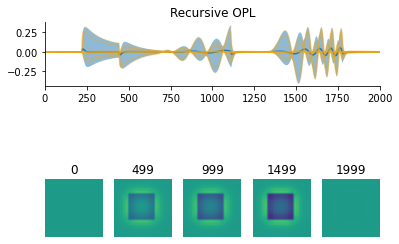

In [6]:
%%time
oR = oplR.run(inp)
oR.plot(title='Recursive OPL')

CPU times: user 670 ms, sys: 51.8 ms, total: 722 ms
Wall time: 365 ms


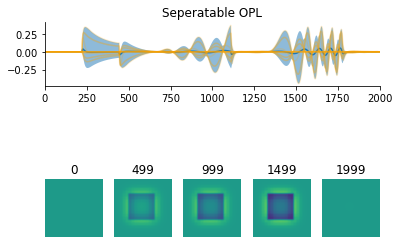

In [7]:
%%time
oS = oplS.run(inp)
oS.plot(title='Seperatable OPL')

CPU times: user 950 ms, sys: 44 ms, total: 994 ms
Wall time: 512 ms


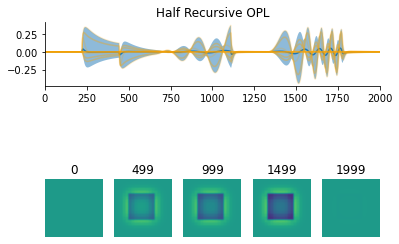

In [8]:
%%time
oH = oplH.run(inp,)
oH.plot(title='Half Recursive OPL')

CPU times: user 7.05 s, sys: 39.8 ms, total: 7.09 s
Wall time: 3.57 s


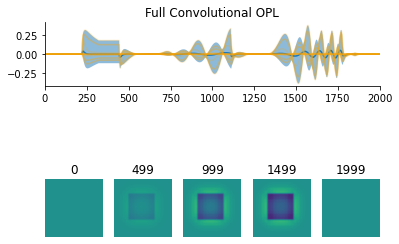

In [9]:
%%time
oF = oplF.run(inp)
oF.plot(title='Full Convolutional OPL')

CPU times: user 1min 21s, sys: 147 ms, total: 1min 21s
Wall time: 41.4 s


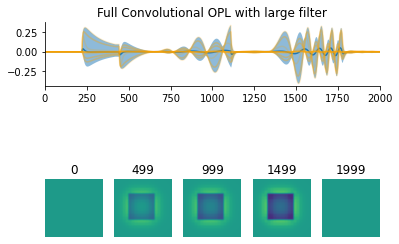

In [10]:
%%time
oF_heavy = oplF_heavy.run(inp)
oF_heavy.plot(title='Full Convolutional OPL with large filter')

# Comparing the Output

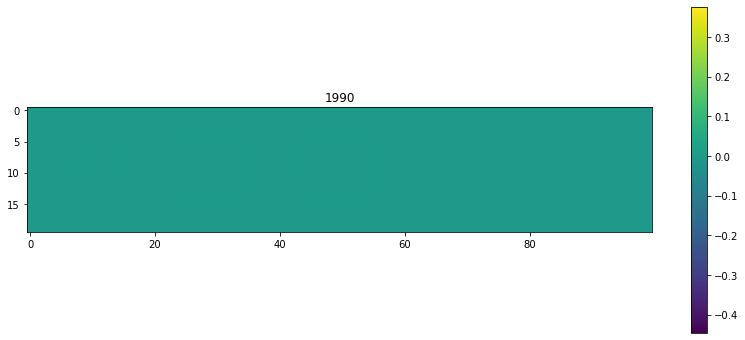

In [11]:
figsize(14,6)
convis.animate_to_video(np.concatenate([oS.array(),oR.array(),oH.array(),oF.array(),oF_heavy.array()],axis=4))

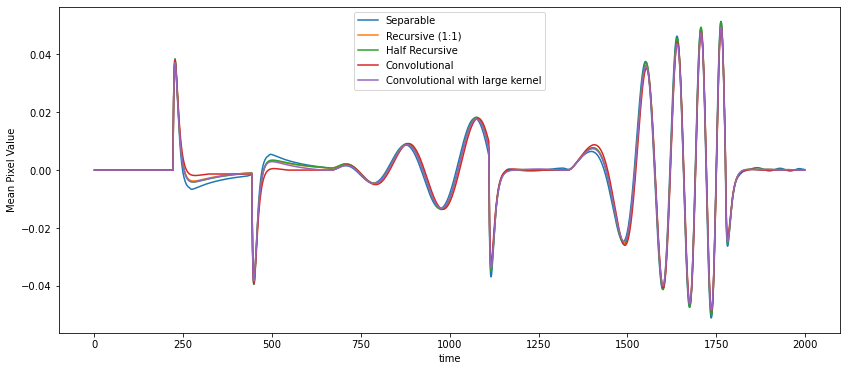

In [12]:
plot(np.mean(oS.array(),(0,1,3,4)),label='Separable')
plot(np.mean(oR.array(),(0,1,3,4)),label='Recursive (1:1)')
plot(np.mean(oH.array(),(0,1,3,4)),label='Half Recursive')
plot(np.mean(oF.array(),(0,1,3,4)),label='Convolutional')
plot(np.mean(oF_heavy.array(),(0,1,3,4)),label='Convolutional with large kernel')
ylabel('Mean Pixel Value')
xlabel('time')
legend()

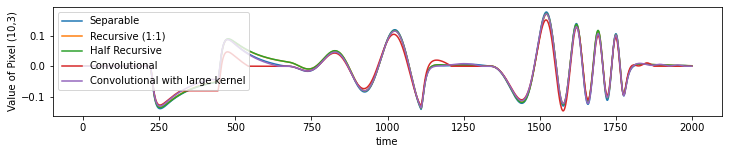

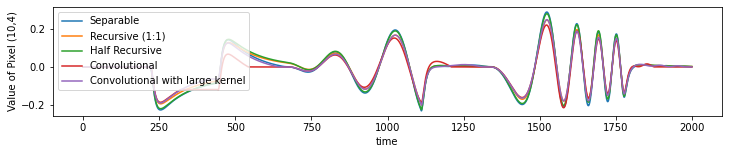

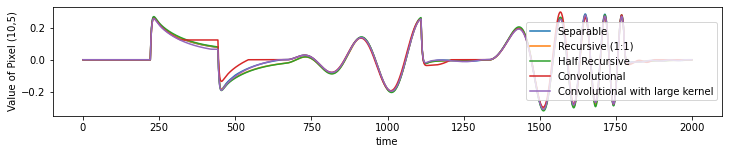

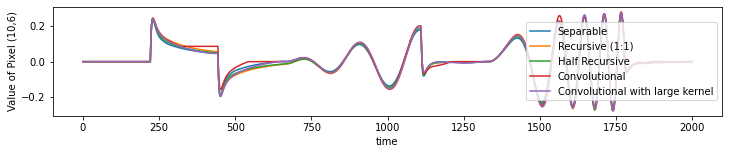

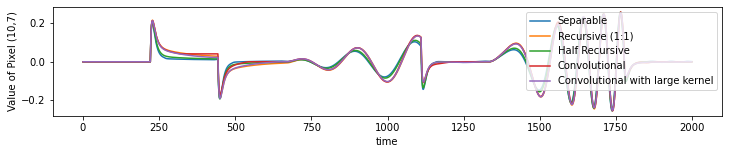

In [13]:
figsize(12,2)
x=10
y=5
for y in [3,4,5,6,7]:
    figure()
    plot(oS.array()[0,0,:,x,y].flatten(),label='Separable')
    plot(oR.array()[0,0,:,x,y].flatten(),label='Recursive (1:1)')
    plot(oH.array()[0,0,:,x,y].flatten(),label='Half Recursive')
    plot(oF.array()[0,0,:,x,y].flatten(),label='Convolutional')
    plot(oF_heavy.array()[0,0,:,x,y].flatten(),label='Convolutional with large kernel')
    ylabel('Value of Pixel ('+str(x)+','+str(y)+')')
    xlabel('time')
    legend()

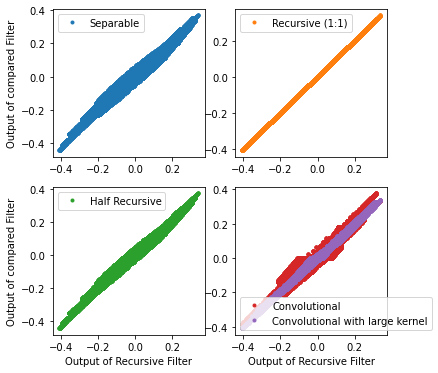

In [14]:
figsize(6,6)
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
subplot(2,2,1)
plot(oR.array().flatten(),oS.array().flatten(),'.',label='Separable')
ylabel('Output of compared Filter')
legend()
subplot(2,2,2)
plot(oR.array().flatten(),oR.array().flatten(),'.',label='Recursive (1:1)',color=c[1])
legend()
subplot(2,2,3)
plot(oR.array().flatten(),oH.array().flatten(),'.',label='Half Recursive',color=c[2])
xlabel('Output of Recursive Filter')
ylabel('Output of compared Filter')
legend()
subplot(2,2,4)
plot(oR.array().flatten(),oF.array().flatten(),'.',label='Convolutional',color=c[3])
plot(oR.array().flatten(),oF_heavy.array().flatten(),'.',label='Convolutional with large kernel',color=c[4])
xlabel('Output of Recursive Filter')
legend()

Plotting the error over time can reveal which dynamics are hard to capture with different versions of the filter. Most notably, the `FullConvolutionOPLFilter` with the standard length kernel shows stronger errors than other filters when the effects of the ON flash and OFF flash combine at around `t=500`.

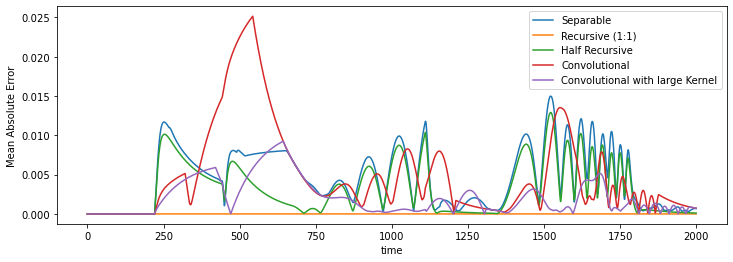

In [15]:
figsize(12,4)
plot(np.mean(abs(oR.array()-oS.array()),(0,1,3,4)),label='Separable')
plot(np.mean(abs(oR.array()-oR.array()),(0,1,3,4)),label='Recursive (1:1)')
plot(np.mean(abs(oR.array()-oH.array()),(0,1,3,4)),label='Half Recursive')
plot(np.mean(abs(oR.array()-oF.array()),(0,1,3,4)),label='Convolutional')
plot(np.mean(abs(oR.array()-oF_heavy.array()),(0,1,3,4)),label='Convolutional with large Kernel')
ylabel('Mean Absolute Error')
xlabel('time')
legend()

## Comparing Signals from Center and Surround separately

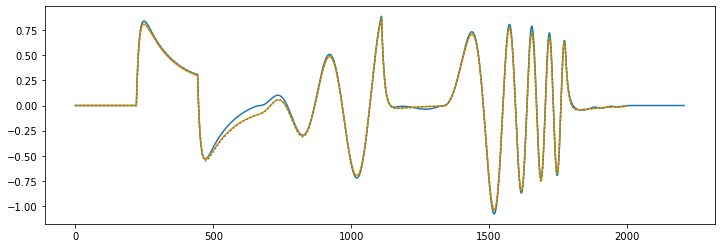

In [16]:
plot(oplS.center_signal.detach().numpy()[0,0,:,10,10])
plot(oplR.center_signal.detach().numpy()[0,0,:,10,10])
plot(oplH.center_signal.detach().numpy()[0,0,:,10,10],':')


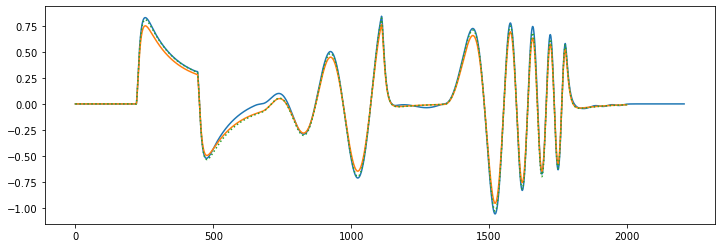

In [17]:
plot(oplS.surround_signal.detach().numpy()[0,0,:,10,10])
plot(oplR.surround_signal.detach().numpy()[0,0,:,10,10])
plot(oplH.surround_signal.detach().numpy()[0,0,:,10,10],':')


## Comparing Filter Shapes

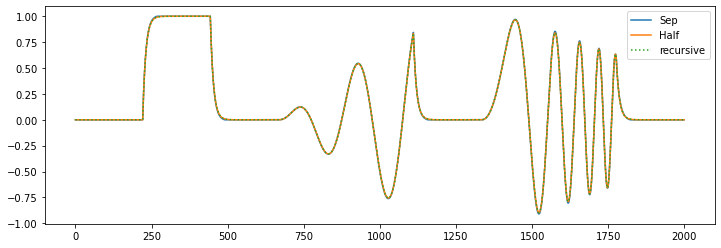

In [19]:
o = oplS.center_E(inp[None,None,:,:,:])[0,0,:,10,10]
plot(o.data,label='Sep')
o = oplH.center_E(inp[None,None,:,:,:])[0,0,:,10,10]
plot(o.data,label='Half')
o = oplR.center_E(inp[None,None,:,:,:])[0,0,:,10,10]
plot(o.data,':',label='recursive')
legend()

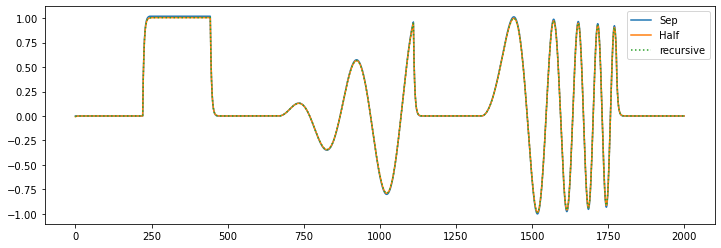

In [21]:
o = oplS.surround_E(inp[None,None,:,:,:])[0,0,:,10,10]
plot(o.data,label='Sep')
o = oplH.surround_E(inp[None,None,:,:,:])[0,0,:,10,10]
plot(o.data,label='Half')
o = oplR.surround_E(inp[None,None,:,:,:])[0,0,:,10,10]
plot(o.data,':',label='recursive')
legend()

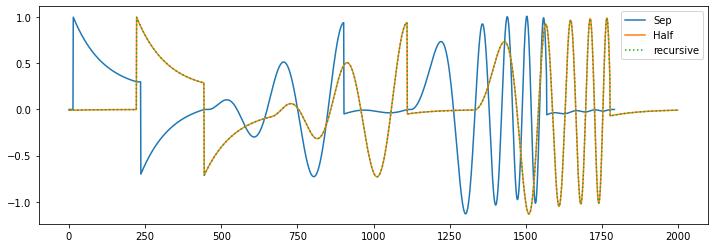

In [22]:
# the separatable filter has an undershoot filter that 
# does not pad it's input automatically
o = oplS.center_undershoot(inp[None,None,:,:,:])[0,0,:,10,10]
plot(o.data,label='Sep')
o = oplH.center_undershoot(inp[None,None,:,:,:])[0,0,:,10,10]
plot(o.data,label='Half')
o = oplR.center_undershoot(inp[None,None,:,:,:])[0,0,:,10,10]
plot(o.data,':',label='recursive')
legend()

(-0.01, 0.1)

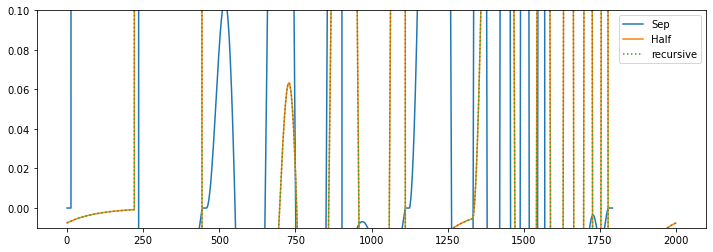

In [23]:
o = oplS.center_undershoot(inp[None,None,:,:,:])[0,0,:,10,10]
plot(o.data,label='Sep')
o = oplH.center_undershoot(inp[None,None,:,:,:])[0,0,:,10,10]
plot(o.data,label='Half')
o = oplR.center_undershoot(inp[None,None,:,:,:])[0,0,:,10,10]
plot(o.data,':',label='recursive')
legend()
#xlim(100,200)
ylim(-0.01,0.1)